In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
plt.style.use('dark_background')

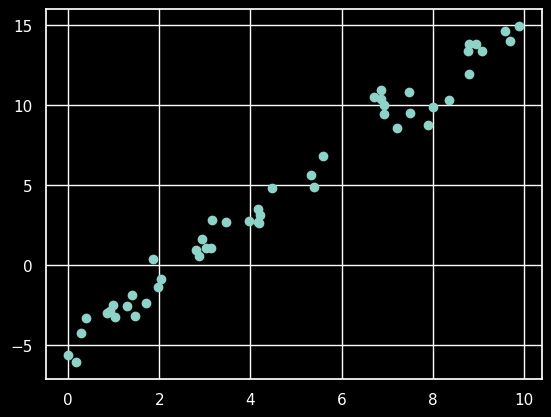

In [5]:
# Let's start with the most familiar linear regression, a straight-line fit to
# data. A straigh-line fit is a model of the form y = ax + b where -a- is 
# commonly known as the slope, and -b- is commonly known as the intercept.
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

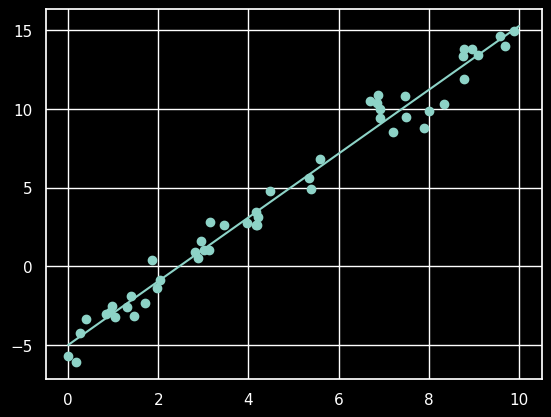

In [7]:
# We can use Scikit-Learn's LinearRegression estimator to fit this data and 
# construct the best-fit line. 
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [8]:
# The slope and intercept of the data are contained in the model's fit
# parameters, which in Scikit-Learn are always marked by a trailing underscore.
print(f"Model slope: {model.coef_[0]}", f"Model intercept: {model.intercept_}", sep = "\n")


Model slope: 2.0272088103606953
Model intercept: -4.998577085553204


In [12]:
# The LinearRegression estimator is much more capable than this, however,
# in addition to simple straight-line fits, it can also handle 
# multidimensional linear models of the form 
# y = a_0 + a_1*x_1 + a_2*x_2 + ... + a_n*x_n
# where there are multiple x values. Geometrically, this is akin to fitting a 
# plane to points in three dimensions, or fitting a hyper-plane to points in
# higher dimensions.
# The multidimensional nature of such regressions makes them more difficoult
# to visualize, but we can see one of these fits in action by building some
# example data, using numpy's multiplication operator.
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., -1.])
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000089
[ 1.5 -2.  -1. ]


array([[8.02963237, 6.96800496, 7.66211381],
       [3.4245412 , 8.45851483, 4.28768775],
       [8.2400987 , 6.26496159, 1.43423049],
       [0.783869  , 0.18332643, 0.66724998],
       [4.58583814, 1.13341923, 0.27783349],
       [7.54861481, 3.9485048 , 7.46938496],
       [4.52404827, 4.50086747, 4.78072507],
       [4.74003927, 8.03163342, 4.0239252 ],
       [9.0468616 , 0.37061048, 7.73874343],
       [1.25641381, 6.18513567, 0.10364261],
       [5.38627283, 0.03017957, 9.51193785],
       [9.05402034, 7.95966942, 9.1527432 ],
       [1.45558231, 1.5773007 , 1.87631673],
       [6.22495902, 9.05809496, 9.89955178],
       [7.11122459, 7.31800409, 9.09293205],
       [4.00873732, 2.4985068 , 1.73430171],
       [1.1945705 , 8.12610588, 1.46792373],
       [2.64297483, 8.19089179, 3.10587252],
       [9.82417449, 2.66638702, 5.33653345],
       [3.14467011, 9.10772831, 3.66556644],
       [4.33592327, 5.12292692, 9.38886477],
       [0.30949006, 7.16878664, 8.91018954],
       [0.